In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

In [6]:
 df = pd.read_csv("C:\\Users\\meswa\\Downloads\\29. sales_data_final.csv")

In [10]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [7]:
df.shape

(51290, 21)

In [11]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,12/31/2014,1/4/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,12/31/2014,1/5/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Dra,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,12/31/2014,1/2/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,12/31/2014,1/6/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,12/31/2014,1/4/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


In [12]:
df.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [21]:
df.info

<bound method DataFrame.info of               order_id  order_date ship_date       ship_mode  \
0         AG-2011-2040    1/1/2011  1/6/2011  Standard Class   
1        IN-2011-47883    1/1/2011  1/8/2011  Standard Class   
2         HU-2011-1220    1/1/2011  1/5/2011    Second Class   
3      IT-2011-3647632    1/1/2011  1/5/2011    Second Class   
4        IN-2011-47883    1/1/2011  1/8/2011  Standard Class   
...                ...         ...       ...             ...   
51285   CA-2014-115427  12/31/2014  1/4/2015  Standard Class   
51286     MO-2014-2560  12/31/2014  1/5/2015  Standard Class   
51287   MX-2014-110527  12/31/2014  1/2/2015    Second Class   
51288   MX-2014-114783  12/31/2014  1/6/2015  Standard Class   
51289   CA-2014-156720  12/31/2014  1/4/2015  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer 

In [22]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print()
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['quantity', 'discount', 'profit', 'shipping_cost', 'year']


We have 16 categorical features : ['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name', 'segment', 'state', 'country', 'market', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'order_priority']


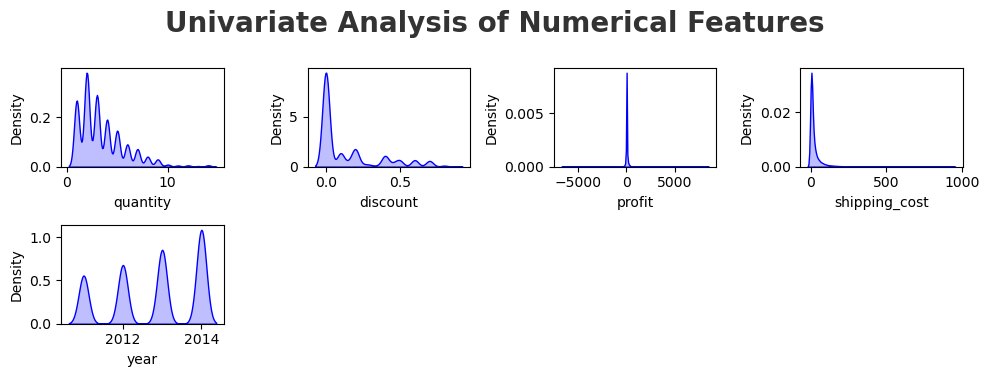

In [24]:
plt.figure(figsize=(10,8))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [25]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')
    print()

order_id
CA-2014-100111     0.027296
TO-2014-9950       0.025346
IN-2012-41261      0.025346
MX-2014-166541     0.025346
NI-2014-8880       0.025346
                     ...   
ES-2014-2815584    0.001950
IN-2014-78228      0.001950
MX-2014-122511     0.001950
OD-2014-9490       0.001950
ES-2011-4869686    0.001950
Name: proportion, Length: 25035, dtype: float64
---------------------------

order_date
6/18/2014     0.263209
11/18/2014    0.247612
9/3/2014      0.245662
11/20/2014    0.230064
12/29/2014    0.226165
                ...   
8/19/2012     0.001950
2/9/2014      0.001950
2/27/2011     0.001950
1/16/2011     0.001950
1/2/2011      0.001950
Name: proportion, Length: 1430, dtype: float64
---------------------------

ship_date
11/22/2014    0.253461
9/7/2014      0.224215
12/7/2014     0.196919
11/17/2014    0.196919
11/29/2014    0.194970
                ...   
3/21/2013     0.005849
1/7/2015      0.005849
1/5/2011      0.003899
1/6/2011      0.003899
1/3/2011      0.003899
Nam

In [26]:
df.select_dtypes(include='number').corr()

,quantity,discount,profit,shipping_cost,year
quantity,1.000000,-0.019875,0.104743,0.272649,-0.005049
discount,-0.019875,1.000000,-0.316375,-0.079056,-0.005894
profit,0.104743,-0.316375,1.000000,0.357033,0.002661
shipping_cost,0.272649,-0.079056,0.357033,1.000000,-0.003136
year,-0.005049,-0.005894,0.002661,-0.003136,1.000000


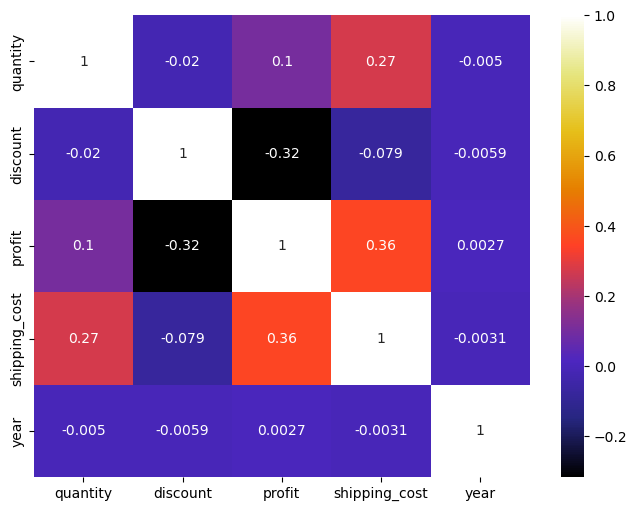

In [28]:
plt.figure(figsize=(8,6))

corr = df.select_dtypes(include='number').corr()

sns.heatmap(corr, cmap="CMRmap", annot=True)
plt.show()